In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
os.chdir("/Users/guneshs/datasets")
os.listdir()

['.DS_Store',
 'Iris_data_sample.txt',
 'Iris_data_sample.xlsx',
 'filtered.csv',
 'Iris_data_sample.csv',
 'Toyota.csv',
 'modified.txt']

In [7]:
## create a new dataframe from cars_data
cars_data = pd.read_csv('Toyota.csv', index_col=0,
                        na_values=["??","????"])

In [9]:
cars_data.dropna(axis=0, inplace=True )

In [11]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 10 columns):
Price        1096 non-null int64
Age          1096 non-null float64
KM           1096 non-null float64
FuelType     1096 non-null object
HP           1096 non-null float64
MetColor     1096 non-null float64
Automatic    1096 non-null int64
CC           1096 non-null int64
Doors        1096 non-null object
Weight       1096 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 94.2+ KB


## Data Visuliazation using Matplotlib and Seaborn 

### Scatter Plot

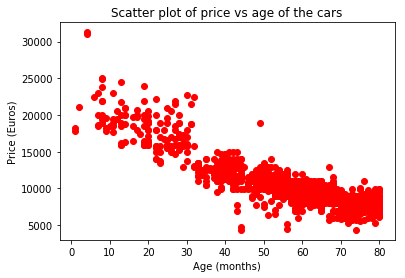

In [16]:
plt.scatter(cars_data['Age'], cars_data['Price'], c='red')
plt.title('Scatter plot of price vs age of the cars')
plt.xlabel('Age (months)')
plt.ylabel('Price (Euros)')
plt.show()

## Histrogram

Text(0, 0.5, 'Frequency')

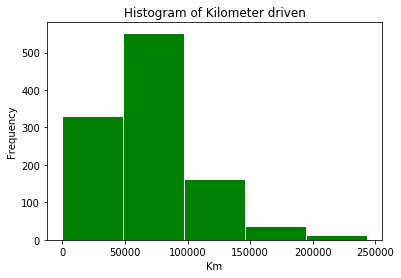

In [43]:
plt.hist(cars_data['KM'],
        color='green',
        edgecolor='white',
        bins=5)
plt.title('Histogram of Kilometer driven')
plt.xlabel('Km')
plt.ylabel('Frequency')

## Bar plot

In [61]:
counts = cars_data['FuelType'].value_counts()
print(counts)

Petrol    968
Diesel    116
CNG        12
Name: FuelType, dtype: int64


In [63]:
fueltype = np.unique(cars_data['FuelType'])
fueltype = fueltype[::-1]

In [64]:
print(fueltype)

['Petrol' 'Diesel' 'CNG']


In [65]:
index = np.arange(len(fueltype))

([<matplotlib.axis.XTick at 0x11e14ef98>,
 <a list of 3 Text xticklabel objects>)

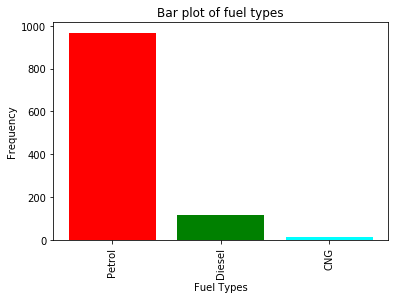

In [66]:
plt.bar(index, counts, color=['red','green','cyan'])
plt.title("Bar plot of fuel types")
plt.xlabel("Fuel Types")
plt.ylabel("Frequency")
plt.xticks(index, fueltype, rotation=90)